In [29]:
library("ggplot2")
library("directlabels")
library("ggrepel")

In [40]:
cwd = getwd()

threshold = "80"

data = read.csv(file=sprintf("%s/data/python_entropy_analysis/entropy_correlation_data_%sperc.csv", cwd,threshold))
data_df = data.frame(data)

In [41]:
data_df

X,Comp_Dis,A.Entropy,Labels,Comp_Behav,B.Entropy,r
<int>,<fct>,<dbl>,<fct>,<fct>,<dbl>,<dbl>
0,IC-01,0.7231195,Temporo-Limbic,IC-18,0.5729087,0.6153400
1,IC-02,0.5663415,Fronto-Striatal,IC-14,0.5065740,0.6151892
2,IC-03,0.6279270,Ventral Attention,IC-16,0.7507620,0.5234964
3,IC-11,0.4688342,Auditory,IC-07,0.4084267,0.5151314
4,IC-20,0.0000000,Medial Visual,IC-20,0.1721772,0.4819234
5,IC-09,0.3593861,Cognitive Control,IC-17,0.6314356,0.4161618
6,IC-12,0.6971225,Salience,IC-04,0.7674804,0.4313501
7,IC-07,0.4656765,R. Cent. Executive,IC-09,0.6129028,0.3885926
8,IC-16,0.6405604,L. Cent. Executive,IC-03,0.6540015,0.3359827



Call:
lm(formula = data_df$B.Entropy ~ data_df$A.Entropy)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.10821 -0.09896 -0.04796  0.10532  0.19535 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)   
(Intercept)        0.19523    0.08646   2.258  0.04178 * 
data_df$A.Entropy  0.67017    0.16397   4.087  0.00128 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1148 on 13 degrees of freedom
Multiple R-squared:  0.5624,	Adjusted R-squared:  0.5287 
F-statistic:  16.7 on 1 and 13 DF,  p-value: 0.001284


[1] "P-Values of Coefficients"


(Intercept) data_df$A.Entropy 
     0.0208893474      0.0006418819

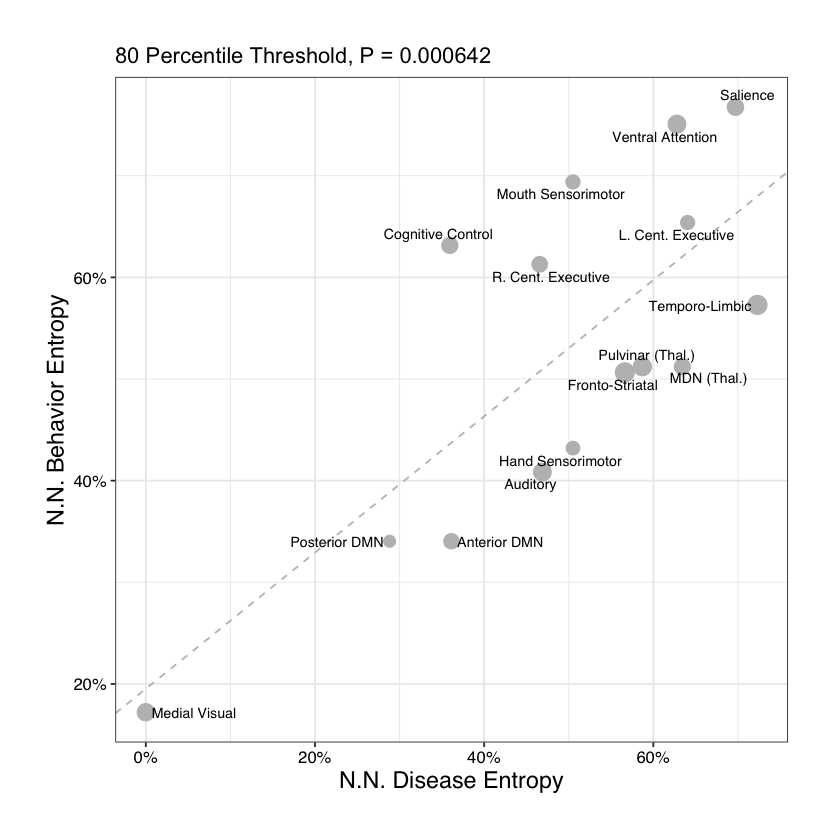

In [42]:
lm = lm(data_df$B.Entropy~data_df$A.Entropy)
# lm = lm(data_df$B.Hits~data_df$A.Hits)
res <- summary(lm)
summary(lm)

# p-values
print("P-Values of Coefficients")
pt(coef(res)[, 3], lm$df, lower = FALSE)

# linear model plot
p <- ggplot(data_df, aes(A.Entropy,B.Entropy))
# p <- ggplot(data_df, aes(A.Hits,B.Hits))

# plot linear model
p <- p + geom_abline(intercept = lm$coefficients[1], slope = lm$coefficients[2], lty=2, col="gray")

# linear model color scale
  p <- p + geom_point(aes(size = data_df$r),colour="gray",show.legend=FALSE) + 
    scale_size_continuous(range=c(3,5)) + #size points according to correlation
    geom_text_repel(aes(label=data_df$Labels), size = 3, family="Helvetica") + #add data labels without overlap
    ylab("N.N. Behavior Entropy") +
    xlab("N.N. Disease Entropy") + 
    theme_bw() + #remove gray background
    #coord_fixed(ratio = 1) + 
    #scale_color_gradient(low = "#0091ff", high = "#f0650e") +
    theme(plot.margin=unit(c(1,1.1,1,1),"cm")) + 
    scale_y_continuous(labels = scales::percent_format(accuracy = 1)) +
    scale_x_continuous(labels = scales::percent_format(accuracy = 1)) +
    theme(axis.text.x = element_text(color = "black", size = 10, face = "plain", family="Helvetica"),
          axis.text.y = element_text(color = "black", size = 10, face = "plain", family="Helvetica"),  
          axis.title.x = element_text(color = "black", size = 14, face = "plain", family="Helvetica"),
          axis.title.y = element_text(color = "black", size = 14, face = "plain", family="Helvetica")) + 
    labs(title = sprintf("%s Percentile Threshold, P = %f", threshold, pt(coef(res)[, 3], lm$df, lower = FALSE)[2]))
  
p 

ggsave(sprintf("%s/figures/linear_model_%sperc.png",cwd,threshold), width = 4.5, height = 4, units = "in", dpi = 500)


Call:
lm(formula = data_df$B.Entropy ~ data_df$A.Entropy)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.10768 -0.10278 -0.06528  0.10938  0.18450 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)  
(Intercept)         0.2254     0.1362   1.654   0.1239  
data_df$A.Entropy   0.6164     0.2496   2.470   0.0295 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1191 on 12 degrees of freedom
Multiple R-squared:  0.337,	Adjusted R-squared:  0.2817 
F-statistic: 6.099 on 1 and 12 DF,  p-value: 0.02952


[1] "P-Values of Coefficients"


(Intercept) data_df$A.Entropy 
       0.06196429        0.01475884

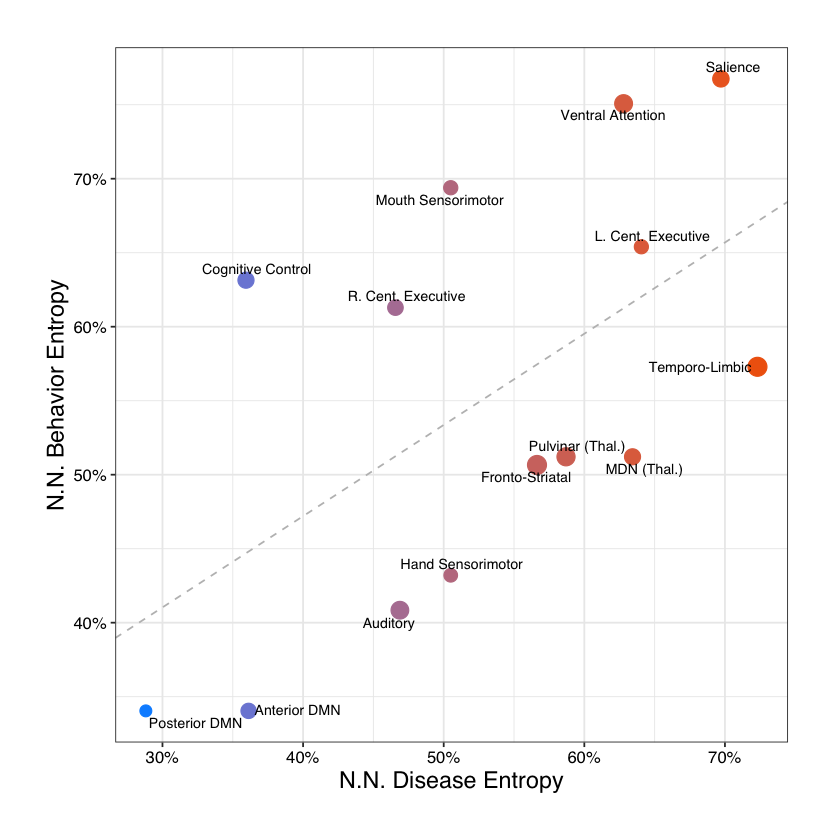

In [43]:
# create linear model (without medial visual)
data_df <- data_df[-c(5), ]
lm = lm(data_df$B.Entropy~data_df$A.Entropy)
# lm = lm(data_df$B.Hits~data_df$A.Hits)
res <- summary(lm)
summary(lm)

# p-values
print("P-Values of Coefficients")
pt(coef(res)[, 3], lm$df, lower = FALSE)

# linear model plot
p <- ggplot(data_df, aes(A.Entropy,B.Entropy))

# plot linear model 
p <- p + geom_abline(intercept = lm$coefficients[1], slope = lm$coefficients[2], lty=2, col="gray")

# linear model color scale
  p <- p + geom_point(aes(size = data_df$r, color = lm$fitted.values), show.legend=FALSE) + 
    scale_size_continuous(range=c(3,5)) + #size points according to correlation
    geom_text_repel(aes(label=data_df$Labels), size = 3, family="Helvetica") + #add data labels without overlap
#     title = "Hello" +
    ylab("N.N. Behavior Entropy") +
    xlab("N.N. Disease Entropy") + 
    theme_bw() + #remove gray background
    #coord_fixed(ratio = 1) + 
    theme(plot.margin=unit(c(1,1.1,1,1),"cm")) + 
    scale_color_gradient(low = "#0091ff", high = "#f0650e") +
    scale_y_continuous(labels = scales::percent_format(accuracy = 1)) +
    scale_x_continuous(labels = scales::percent_format(accuracy = 1)) +
    theme(axis.text.x = element_text(color = "black", size = 10, face = "plain", family="Helvetica"),
          axis.text.y = element_text(color = "black", size = 10, face = "plain", family="Helvetica"),  
          axis.title.x = element_text(color = "black", size = 14, face = "plain", family="Helvetica"),
          axis.title.y = element_text(color = "black", size = 14, face = "plain", family="Helvetica")) 
  
p 

ggsave(sprintf("%s/figures/linear_model_%sperc_nomedvis.png",cwd,threshold), width = 4.5, height = 4, units = "in", dpi = 500)